## Data exploration

This script performs some data exploration to see, what kind of data our data set contains.

In [3]:
import pandas as pd
import numpy as np
import pathlib
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

sys.path.append(os.path.abspath('configs'))
from config import *
path = pathlib.Path.cwd()

In [4]:
data_path = path / "CompiledDataSet" / "Cassini_CDA_Count+Event_V2.csv"

df = pd.read_csv(data_path, index_col=0, parse_dates=["TIME"])
df.head()

,TIME,COUNTER_0,COUNTER_1,COUNTER_2,COUNTER_3,COUNTER_4,COUNTER_5,COUNTER_6,COUNTER_7,COUNTER_8,...,QC_RISE_TIME,SPACECRAFT_RA,SC_SIII_LONG,SC_SIII_LAT,SC_SAT_DIST,SC_X_VEL,SC_Y_VEL,SC_Z_VEL,DETECTOR_RA,DETECTOR_DEC
0,2005-01-01 00:00:34,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,NaN,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25
1,2005-01-01 00:01:38,0.0,0.0,0.0,0.0,0.0,0.046875,0.0,0.0,0.0,...,NaN,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25
2,2005-01-01 00:02:42,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,...,NaN,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25
3,2005-01-01 00:03:46,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,...,NaN,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25
4,2005-01-01 00:04:50,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,...,NaN,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.60,59.23


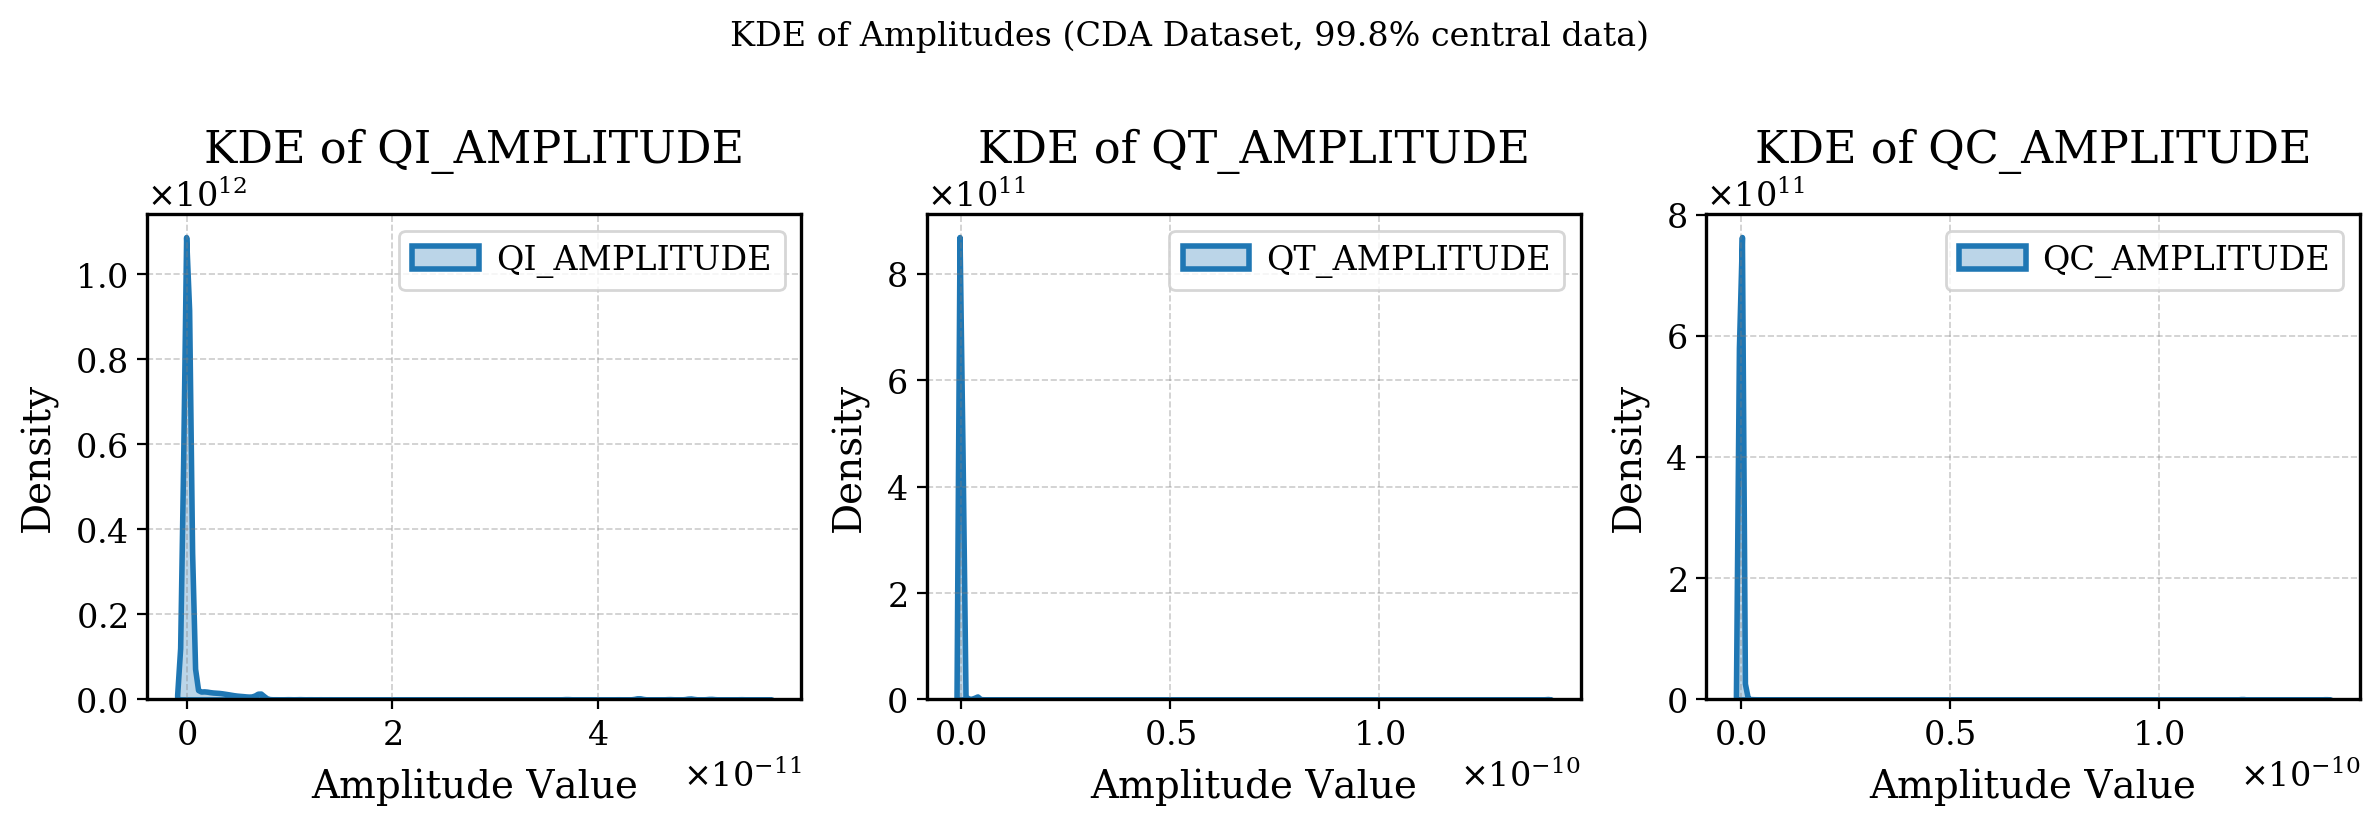

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs = axs.flatten()

amplitude_cols = ["QI_AMPLITUDE", "QT_AMPLITUDE", "QC_AMPLITUDE"]

for i, col in enumerate(amplitude_cols):
    ax = axs[i]
    data = df[col].dropna()
    sns.kdeplot(data, label=col, fill=True, alpha=0.3, lw=2, ax=ax)
    ax.set_xlabel("Amplitude Value")
    ax.set_ylabel("Density")
    ax.set_title(f"KDE of {col}")
    ax.legend()

plt.suptitle("KDE of Amplitudes (CDA Dataset, 99.8% central data)", y=1.02)
plt.tight_layout()
plt.show()

Looks as expected

In [25]:
# Add the plume labels

flybys = [
    ("E3",  "2008-03-12 19:06:45"), #Confirmed YDong
    ("E4",  "2008-08-11 21:06:30"), # Confirmed
    ("E5",  "2008-10-09 19:07:00"), # Confirmed
    ("E6",  "2008-10-31 17:15:30"), #Confirmed
    ("E7",  "2009-11-02 07:42:00"), #Confirmed
    ("E9",  "2010-04-28 00:10:00"), #Half confirmed
    ("E10", "2010-05-18 06:01:17"),
    ("E12", "2010-11-30 11:54:00"), # Half confirmed
    ("E13", "2010-12-21 01:08:00"), #Half confirmed
    ("E14", "2011-10-01 13:52:26"), # Confirmed
    ("E17", "2012-03-27 18:30:09"), # Confirmed
    ("E18", "2012-04-14 14:01:30"), #Confirmed
    ("E19", "2012-05-02 09:31:00"), # Half confirmed
    ("E21", "2015-10-28 15:22:42"), #Half confirmed
]

plume_durations = {
    "E3": 25, "E4": 20, "E5": 20, "E6": 30, "E7": 30, "E9": 60, "E10": 60,
    "E12": 40, "E13": 40, "E14": 50, "E17": 60, "E18": 60, "E19": 60, "E21": 40
}

In [28]:
t_sec = df["TIME"].astype(np.int64) // 10**9

for name, time_str in flybys:
    t0 = pd.Timestamp(time_str).value // 10**9
    duration = plume_durations[name]
    # Use full FWHM window centered on plume peak
    in_window = np.abs(t_sec - t0) <= (3*duration // 2)
    num_points = np.sum(in_window)
    frac = num_points / len(df)
    print(f"{name} at {time_str}: {num_points} points ({frac:.2%} of total) in {3*duration}s plume window")

E3 at 2008-03-12 19:06:45: 0 points (0.00% of total) in 75s plume window
E4 at 2008-08-11 21:06:30: 0 points (0.00% of total) in 60s plume window
E5 at 2008-10-09 19:07:00: 0 points (0.00% of total) in 60s plume window
E6 at 2008-10-31 17:15:30: 0 points (0.00% of total) in 90s plume window
E7 at 2009-11-02 07:42:00: 22 points (0.00% of total) in 90s plume window
E9 at 2010-04-28 00:10:00: 51 points (0.01% of total) in 180s plume window
E10 at 2010-05-18 06:01:17: 1 points (0.00% of total) in 180s plume window
E12 at 2010-11-30 11:54:00: 0 points (0.00% of total) in 120s plume window
E13 at 2010-12-21 01:08:00: 37 points (0.01% of total) in 120s plume window
E14 at 2011-10-01 13:52:26: 65 points (0.01% of total) in 150s plume window
E17 at 2012-03-27 18:30:09: 163 points (0.04% of total) in 180s plume window
E18 at 2012-04-14 14:01:30: 165 points (0.04% of total) in 180s plume window
E19 at 2012-05-02 09:31:00: 32 points (0.01% of total) in 180s plume window
E21 at 2015-10-28 15:22:42:

In [29]:
# Convert timestamp column to seconds since epoch
t_sec = df["TIME"].astype(np.int64) // 10**9

# Initialize label: 0 = background, 1 = in plume window
plume_label = np.zeros(len(df), dtype=int)

for name, time_str in flybys:
    t0 = pd.Timestamp(time_str).value // 10**9
    duration = plume_durations[name]
    # Use actual plume duration window, centered on peak
    in_window = np.abs(t_sec - t0) <= (duration // 2)
    plume_label = np.logical_or(plume_label, in_window).astype(int)

df["PLUME_LABEL"] = plume_label

# Optional: see how many plume vs background points
n_plume = np.sum(plume_label)
print(f"{n_plume} points labeled as plume, {len(df)-n_plume} as background (using plume durations).")

232 points labeled as plume, 450681 as background (using plume durations).


In [10]:
df.head()

,TIME,COUNTER_0,COUNTER_1,COUNTER_2,COUNTER_3,COUNTER_4,COUNTER_5,COUNTER_6,COUNTER_7,COUNTER_8,...,SPACECRAFT_RA,SC_SIII_LONG,SC_SIII_LAT,SC_SAT_DIST,SC_X_VEL,SC_Y_VEL,SC_Z_VEL,DETECTOR_RA,DETECTOR_DEC,PLUME_LABEL
0,2005-01-01 00:00:34,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,0
1,2005-01-01 00:01:38,0.0,0.0,0.0,0.0,0.0,0.046875,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,0
2,2005-01-01 00:02:42,0.0,0.0,0.0,0.0,0.0,0.031250,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,0
3,2005-01-01 00:03:46,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.33,59.25,0
4,2005-01-01 00:04:50,0.0,0.0,0.0,0.0,0.0,0.015625,0.0,0.0,0.0,...,115.32,223.44,12.46,59.63,-8.38,-4.45,-1.08,67.60,59.23,0


In [11]:
df.to_csv("CompiledDataSet/Cassini_CDA_Count+Event_V3.csv")